<a href="https://colab.research.google.com/github/Demesmaeker/DL_computer_vision_Pneumonia/blob/main/00_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls

adc.json  chest_xray  drive  Pneumonia_datas  sample_data


# Pre-Processing


In [5]:
root_dir = "./drive/MyDrive/Collab_datas/"
data_dir = root_dir + "chest_xray/"

training_dir =  data_dir + "train/"
test_dir = data_dir + "test/"
val_dir = data_dir + "val/"

training_dir

'./drive/MyDrive/Collab_datas/chest_xray/train/'

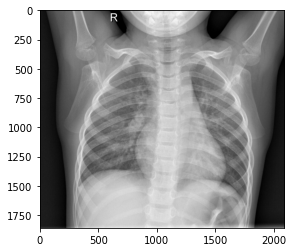

In [6]:
# Show the image
img = cv2.imread(training_dir + "NORMAL/IM-0115-0001.jpeg")
plt.imshow(img)

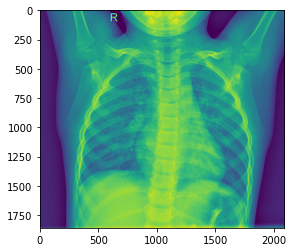

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [8]:
gray

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [9]:
gray.max()

255

In [10]:
def list_folders(startpath):
    """Print the folder sutructure of a given folder"""
    
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))

In [11]:
list_folders(training_dir)

/
NORMAL/
PNEUMONIA/


In [12]:
cat = [['NORMAL'],
       ['PNEUMONIA']]

In [26]:
img_size = (100, 100)

In [27]:
x_train = []
y_train = []
 
for i in range(len(cat)):
    print(f'{round(((i + 1) / (len(cat)) * 100))}%')
    for elem in os.listdir(training_dir + cat[i][0]):
        if elem == '.DS_Store':
          continue
        img = cv2.imread(training_dir+cat[i][0]+ "/" + elem)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray colorisationprint(elem)
        img_gray = cv2.resize(img_gray, img_size)
        x_train.append(img_gray)
        y_train.append(i)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


50%
100%


In [28]:
x_test = []
y_test = []
 
for i in range(len(cat)):
    print(f'{round(((i + 1) / (len(cat)) * 100))}%')
    for elem in os.listdir(test_dir + cat[i][0]):
        if elem == '.DS_Store':
          continue
        img = cv2.imread(test_dir+cat[i][0]+ "/" + elem)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray colorisationprint(elem)
        img_gray = cv2.resize(img_gray, img_size)
        x_test.append(img_gray)
        y_test.append(i)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)


50%
100%


In [31]:
print(x_train.shape, len(x_test), len(y_train), len(y_test))

(5216, 100, 100) 630 5216 630


In [16]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=360,
#     horizontal_flip=True,
#     vertical_flip=True,
    
#     ).flow_from_directory(
#         training_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [17]:
# train_iter = iter(train_datagen)
# train = train_iter.next()
# train

In [18]:
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
#         test_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [19]:
# val_datagen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
#         val_dir,
#         target_size=(100, 100),
#         color_mode="grayscale",
#         class_mode="categorical",
#         batch_size=32,
#         shuffle=True,
#         seed=42
# )

In [20]:
from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
input_size = 100
kernel_size = (5,5)
output_size = len(cat)

In [32]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, len(cat))
y_test = to_categorical(y_test, len(cat))

In [33]:
x_train = np.stack(x_train).reshape(len(x_train), 100, 100, 1)
x_test = np.stack(x_test).reshape(len(x_test), 100, 100, 1)

In [34]:
np.save(f'./drive/MyDrive/Collab_datas/chest_xray/x_train.npy', x_train)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray/y_train.npy', y_train)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray/x_test.npy', x_test)
np.save(f'./drive/MyDrive/Collab_datas/chest_xray/y_test.npy', y_test)

In [35]:
x_train = np.load(f'./drive/MyDrive/Collab_datas/chest_xray/x_train.npy', allow_pickle=True)
y_train = np.load(f'./drive/MyDrive/Collab_datas/chest_xray/y_train.npy', allow_pickle=True)
x_test = np.load(f'./drive/MyDrive/Collab_datas/chest_xray/x_test.npy', allow_pickle=True)
y_test = np.load(f'./drive/MyDrive/Collab_datas/chest_xray/y_test.npy', allow_pickle=True)

(5216, 100, 100, 1)

# Model V1 

### Model creation

In [38]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size, activation='relu', input_shape=(input_size, input_size, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Conv2D(32, kernel_size, activation='relu', ))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                495648    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
163/163 [==============================] - 2s 9ms/step - loss: 5.4559 - accuracy: 0.6872 - val_loss: 0.6535 - val_accuracy: 0.6190
Epoch 2/10
163/163 [==============================] - 1s 8ms/step - loss: 0.4902 - accuracy: 0.7517 - val_loss: 0.5454 - val_accuracy: 0.7556
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: 0.4120 - accuracy: 0.7846 - val_loss: 0.9112 - val_accuracy: 0.7079
Epoch 4/10
163/163 [==============================] - 1s 8ms/step - loss: 0.3251 - accuracy: 0.8089 - val_loss: 1.3701 - val_accuracy: 0.6841
Epoch 5/10
163/163 [==============================] - 2s 10ms/step - loss: 0.2889 - accuracy: 0.8087 - val_loss: 1.0562 - val_accuracy: 0.7635
Epoch 6/10
163/163 [==============================] - 1s 8ms/step - loss: 0.2884 - accuracy: 0.8168 - val_loss: 0.7204 - val_accuracy: 0.7937
Epoch 7/10
163/163 [==============================] - 1s 8ms/step - loss: 0.2423 - accuracy: 0.9112 - val_loss: 1.7012 - val_accuracy: 0.7381
Epoch

### Model evaluation

20/20 - 0s - loss: 2.0156 - accuracy: 0.7667


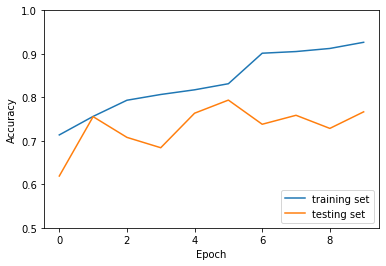

In [40]:
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 76.66666666666667
That means that out of 630 test samples, this model got 483 correct and 147 incorrect
